In [ ]:
## 데이터 준비

from keras.datasets import imdb
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=300)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)


# LSTM

타임스텝이 긴 데이터를 효과적으로 학습하기 위해 고안된 순환층이다. 입력 게이트, 삭제 게이트, 출력 게이트 역할을 하는 작은 셀 4개가 포함된다. 은닉 상태 외에 셀 상태가 순환한다.

In [ ]:
## LSTM 클래스: LSTM 셀을 생성하는 클래스
## LSTM(뉴런의 개수)

from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.Embedding(300, 16, input_length=100, input_shape=(100,)))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 100, 16)             │           4,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 8)                   │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,609 (21.91 KB)

 Trainable params: 5,609 (21.91 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 42ms/step - accuracy: 0.5090 - loss: 0.6929 - val_accuracy: 0.5716 - val_loss: 0.6922
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.5538 - loss: 0.6918 - val_accuracy: 0.6204 - val_loss: 0.6896
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 67ms/step - accuracy: 0.6135 - loss: 0.6881 - val_accuracy: 0.6652 - val_loss: 0.6767
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 57ms/step - accuracy: 0.6655 - loss: 0.6615 - val_accuracy: 0.6820 - val_loss: 0.6224
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 74ms/step - accuracy: 0.6833 - loss: 0.6159 - val_accuracy: 0.6956 - val_loss: 0.6046
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 42ms/step - accuracy: 0.7011 - loss: 0.5994 - val_accuracy: 0.7118 - val_loss: 0.5884
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - accuracy: 0.7178 - loss: 0.5821 - val_accuracy: 0.7236 - val_loss: 0.5758
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - accuracy: 0.7267 - loss: 0

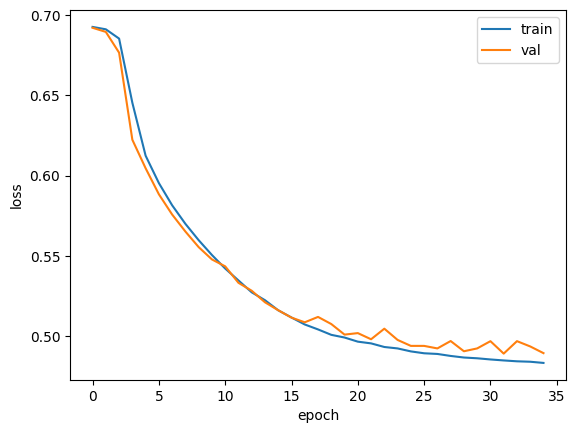

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()


*   순환층은 자체적으로 드롭아웃 기능을 제공한다. dropout 매개변수는 셀의 입력에 드롭아웃을 적용하고 recurrent_dropout은 순환되는 은닉 상태에 드롭아웃을 적용한다
*   순환층은 밀집층이나 합성곱층처럼 2개 이상을 연결할 수 있다. 순환층을 쌓기 위해서는 모든 타임스텝의 은닉 상태를 출력해야한다.



In [26]:
# dropout 매개변수: 입력에 대한 드롭아웃 비율을 지정한다
# return_sequences 매개변수: 모든 타임스텝의 은닉 상태를 출력할지 결정한다

model2 = keras.Sequential()
model2.add(keras.layers.Embedding(300, 16, input_length=100, input_shape=(100,)))
model2.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)              │ (None, 100, 16)             │           4,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 100, 8)              │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 8)                   │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,153 (24.04 KB)

 Trainable params: 6,153 (24.04 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.keras', save_best_only=True)
eraly_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 34s 96ms/step - accuracy: 0.5015 - loss: 0.6932 - val_accuracy: 0.4888 - val_loss: 0.6931
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 83ms/step - accuracy: 0.5183 - loss: 0.6929 - val_accuracy: 0.5134 - val_loss: 0.6927
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 81ms/step - accuracy: 0.5443 - loss: 0.6924 - val_accuracy: 0.5924 - val_loss: 0.6918


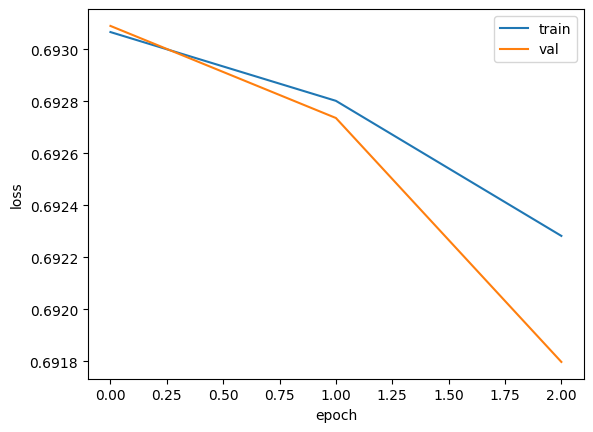

In [28]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

# GRU

LSTM 셀의 간소화 버전이지만 LSTM 셀만큼의 성능을 낸다. 셀 상태가 존재하지 않고 작은 셀의 개수는 3개다.

In [29]:
## GRU 클래스: GRU 셀을 생성하는 클래스
## GRU(뉴런의 개수)

model3 = keras.Sequential()
model3.add(keras.layers.Embedding(300, 16, input_length=100, input_shape=(100,)))
model3.add(keras.layers.GRU(8))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

model3.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)              │ (None, 100, 16)             │           4,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 8)                   │             624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,433 (21.22 KB)

 Trainable params: 5,433 (21.22 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.keras', save_best_only=True)
eraly_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 51ms/step - accuracy: 0.5278 - loss: 0.6924 - val_accuracy: 0.5348 - val_loss: 0.6917
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.5510 - loss: 0.6911 - val_accuracy: 0.5430 - val_loss: 0.6902
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.5637 - loss: 0.6895 - val_accuracy: 0.5592 - val_loss: 0.6879


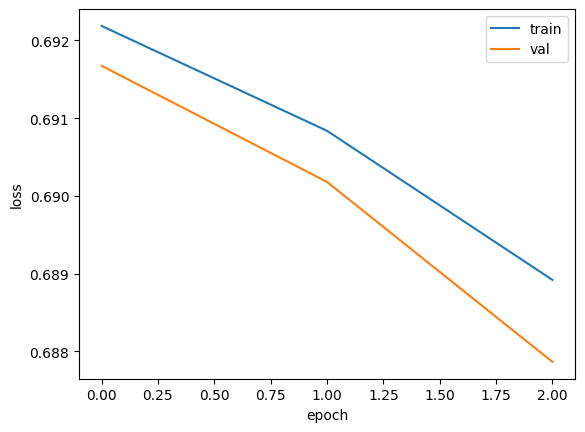

In [31]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()